# Imaging Genomics of Glioblastoma II

<p  style="text-align:justify">In this project, we analyze paired genomic and imaging data from the Glioblastoma cohort in The Cancer Genome Atlas (TCGA) and The Cancer Imaging Atlas (TCIA) to explore possible associations between imaging and genomic features. 
    
This is situated in the field of radiogenomics which aims at studying possible associations between imaging and genomics with the goal of predicting genomic features using imaging studies. This is extremely desirable given that imaging studies are painless and easily obtained, whereas obtaining genomic features is risky, expensive, and not always possible.<br><br>
In this notebook, we use t-SNE on the imaging features, and explore results in terms of association with clinical data, and genomic data
<br>
<br>
Imaging features were obtained from [2]. Mutation data was downloaded from TCGA [3].
    </p>
<br>
We have 102 subjects with imaging features (N = 704), 57 subjects with imaging and mutation data, and 101 subjects with imaging and clinical data.

<br>
We start by loading the necessary libraries and matrix with imaging features:

In [1]:
options(warn=-1)
#Loads libraries
suppressPackageStartupMessages(library(Rtsne))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(ggpubr))

#Loads data matrix
im <- read.table("data/data_glioblastoma_2/matrix_radiomics.txt", header = TRUE, sep="\t")
#Imaging features summary
head(im)
print("Rows:", quote=FALSE)
nrow(im)
print("Cols:", quote=FALSE)
ncol(im)


,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,⋯,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-02-0006,1662,384,36268,2046,38314,1469432,4.3281250,0.04582552,0.01058785,0.81232,⋯,0.33980,0.021897,2203.203,61.3293,8.00000,7.50000e-07,0.1786090,0.0962562,0.0527410,2.0000
TCGA-02-0009,4362,4349,15723,8711,24434,1295721,1.0029892,0.27742797,0.27660116,0.50075,⋯,0.28715,0.189980,1440.428,3.5999,3.31250,1.00000e-09,0.0776185,0.1229000,0.0943361,91.4736
TCGA-02-0011,33404,48612,45798,82016,127814,1425843,0.6871554,0.72937683,1.06144373,0.40729,⋯,0.17961,1.068800,1147.518,0.8048,5.78125,1.00000e-09,0.1322830,0.1160060,0.0960353,272.4290
TCGA-02-0027,12114,7587,34086,19701,53787,1403429,1.5966785,0.35539518,0.22258405,0.61489,⋯,0.41179,0.206600,3320.169,4.7336,3.87500,1.00000e-09,0.1004150,0.0882489,0.0964702,128.4680
TCGA-02-0033,34538,7137,65653,41675,107328,1365237,4.8392882,0.52606888,0.10870790,0.82875,⋯,0.31043,0.413750,1834.105,2.4532,1.00000,5.72500e-08,0.1061840,0.1319520,0.0968941,240.7780
TCGA-02-0034,45111,25394,84003,70505,154508,1533461,1.7764433,0.53701654,0.30229873,0.63983,⋯,0.27280,0.912150,1791.223,1.0657,1.00000,1.18187e-07,0.1543180,0.0795769,0.1089960,167.3260


[1] Rows:


[1] 102

[1] Cols:


[1] 704

<p  style="text-align:justify; line-height: 2; margin: 3px">
Imaging features include volumetric features such as <b>VOLUME_ET</b> (volume of the growing section of the tumour), <b>VOLUME_NET</b> (volume of the necrotic portion of the tumour), <b>VOLUME_ED</b> (volume of edema), among other shape features; as well as more complex features, like first and second-order statistics. For more detail regarding the imaging features, see publication by Bakas et al. [2].
<br>
<br>
<b> t-SNE: t-distributed Stochastic Neighbor Embedding</b> <br>
t-SNE is a nonlinear dimensionality reduction technique attempting to model each p-dimensional object by a $p^*$- dimensional point (being $p^* \lt\lt p$) with the condition that similar objects in the high dimensional space are modelled by close points in the lower-dimensional space and vice versa [1]. <br><br>

Hyperparameters are extremely important for t-SNE. Perplexity is the hyperparameter with the greatest influence on the plot. Recommended values range from 5 to 50, and the general rule is to obtain plots with different perplexity values and to select the one that produces the ”best” plot.

<br>
We find a 2-dimensional map of the imaging features with perplexity values of 5, 15, and 30:
</p>

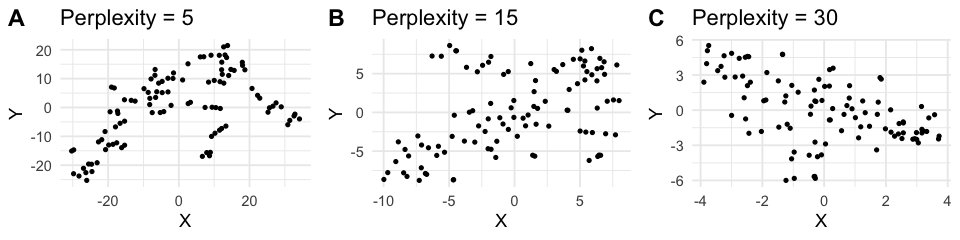

In [2]:
options(repr.plot.width=3, repr.plot.height=2)
#Applies t-SNE with perplexity values
p <- array()

for (i in c(5,15,30)){
title = paste("Perplexity = ", i, sep="")

##tSNE
tsne <- Rtsne(im, dims = 2, check_duplicates=FALSE, pca=FALSE, is_distance=FALSE, perplexity=i)
#Saves low-dimensional map in data
data <- tsne$Y
data <- as.data.frame(data)
colnames(data) <- c("X", "Y")
    
assign(paste("p_",i,sep=""),    ggplot(data, aes(x=X, y=Y)) +
    geom_point(size = 0.8, stat="identity")+
    ggtitle(title)+
    theme_minimal())
    

}
options(repr.plot.width=8, repr.plot.height=2)
ggarrange(p_5, p_15, p_30, 
          labels = c("A", "B", "C"),
          ncol = 3, nrow = 1)

<br>
In the plots, we can noisy clusters when using perplexity values of 5, and 15. They are characterised by the grouping of samples in a linear shape. The plot with a perplexity value of 30 returned the visually best result, therefore, we use the perplexity = 30 from now on. <br>

Using perplexity = 30, we find a 3-dimensional map with t-SNE:



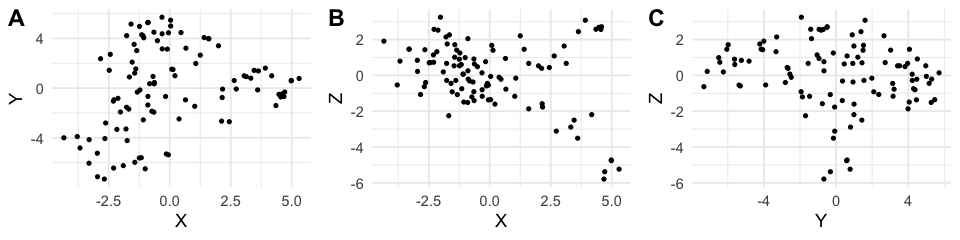

In [3]:
#Applies t-SNE with perplexity = 30
i = 30

##tSNE
tsne <- Rtsne(im, dims = 3, check_duplicates=FALSE, pca=FALSE, is_distance=FALSE, perplexity=i)
#Save low-dimensional map in data
data <- tsne$Y
data <- as.data.frame(data)
rownames(data) <- rownames(im)
colnames(data) <- c("X", "Y", "Z")
options(repr.plot.width=8, repr.plot.height=2)

#Plots 3 dimensions
d1 <- ggplot(data, aes(x=X, y=Y)) +
    geom_point(size = 0.8, stat="identity")+
    theme_minimal()
    
d2 <- ggplot(data, aes(x=X, y=Z)) +
    geom_point(size = 0.8, stat="identity")+
    theme_minimal()
    
d3 <- ggplot(data, aes(x=Y, y=Z)) +
    geom_point(size = 0.8, stat="identity")+
    theme_minimal()
    
ggarrange(d1, d2, d3, 
          labels = c("A", "B", "C"),
          ncol = 3, nrow = 1)

Once we have the visualizations of the 3D maps, we apply a colormap with clinical variables extracted from TCGA: gender, and survival status of patients after one year (1 if patients survived, 0 if they did not survive). Survival status was computed as the difference between the day of initial diagnosis and the date of the last follow-up

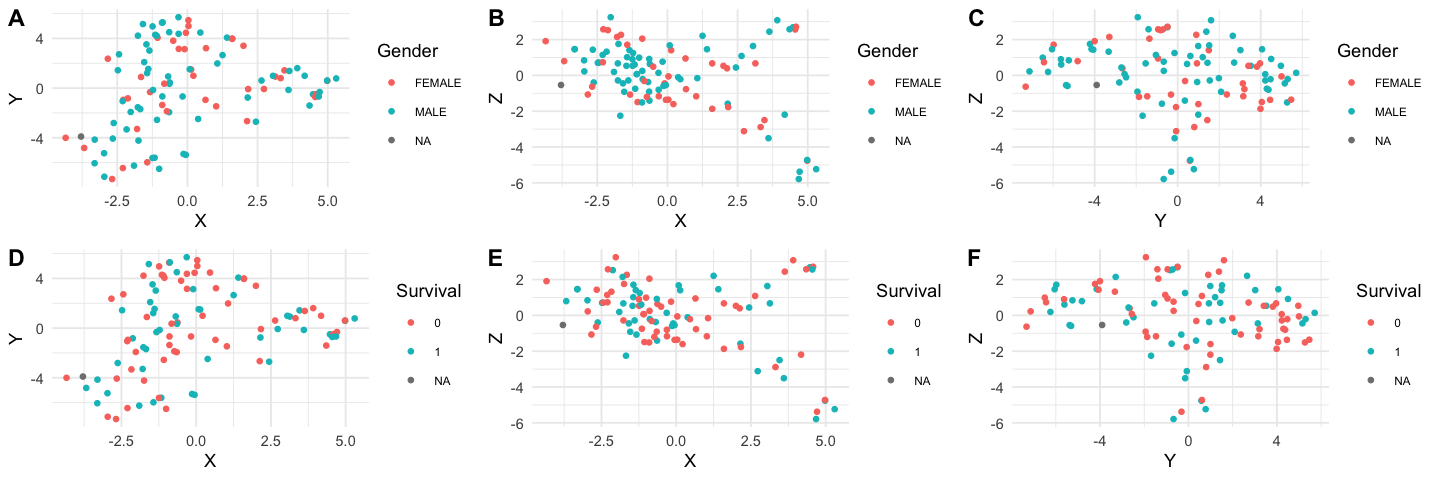

In [4]:
#Reads clinical data matrix
clinical <- read.table("data/data_glioblastoma_2/matrix_clinical.txt", header=TRUE, sep="\t")
clinical <- as.data.frame(clinical)

#Binds t-SNE 3D map and clinical features
matrix <- cbind(data, clinical[rownames(data), c("gender", "survival_one_year")])
colnames(matrix) <- c("X", "Y", "Z", "Gender", "Survival_one_year")
matrix[ , "Survival_one_year"] <- as.factor(matrix[ , "Survival_one_year"])

#Plots label gender
p1 <- ggplot(matrix, aes(x=X, y=Y)) +
    geom_point(size = 1.2, stat="identity", aes(colour=Gender))+
    theme_minimal()+
    theme(legend.text=element_text(size=7))
    
p2 <- ggplot(matrix, aes(x=X, y=Z)) +
    geom_point(size = 1.2, stat="identity", aes(colour=Gender))+
    theme_minimal()+
    theme(legend.text=element_text(size=7))
    
p3 <- ggplot(matrix, aes(x=Y, y=Z)) +
    geom_point(size = 1.2, stat="identity", aes(colour=Gender))+
    theme_minimal()+
    theme(legend.text=element_text(size=7))
    

#Plots label survival after one year
p4 <- ggplot(matrix, aes(x=X, y=Y)) +
    geom_point(size = 1.2, stat="identity", aes(colour=Survival_one_year))+
    labs(colour = "Survival")+
    theme_minimal()+
    theme(legend.text=element_text(size=7))
    
p5 <- ggplot(matrix, aes(x=X, y=Z)) +
    geom_point(size = 1.2, stat="identity", aes(colour=Survival_one_year))+
    labs(colour = "Survival")+
    theme_minimal()+
    theme(legend.text=element_text(size=7))
    
p6 <- ggplot(matrix, aes(x=Y, y=Z)) +
    geom_point(size = 1.2, stat="identity", aes(colour=Survival_one_year))+
    labs(colour = "Survival")+
    theme_minimal()+
    theme(legend.text=element_text(size=7))
    
options(repr.plot.width=12, repr.plot.height=4)

ggarrange(p1, p2, p3, p4, p5, p6,
          labels = c("A", "B", "C", "D", "E", "F"),
          ncol = 3, nrow = 2)




Results showed no grouping of samples. Not having a grouping of samples when colouring by gender is expected, since imaging features should not be affected by gender. On the other hand, not having a stratification based on the survival status possibly means that either imaging features do not hold information predictive of the survival status, or that such information is not captured in the low-dimensional space<br>

We then apply a colormap for the mutation status of the 9 relevant genes in glioblastoma:

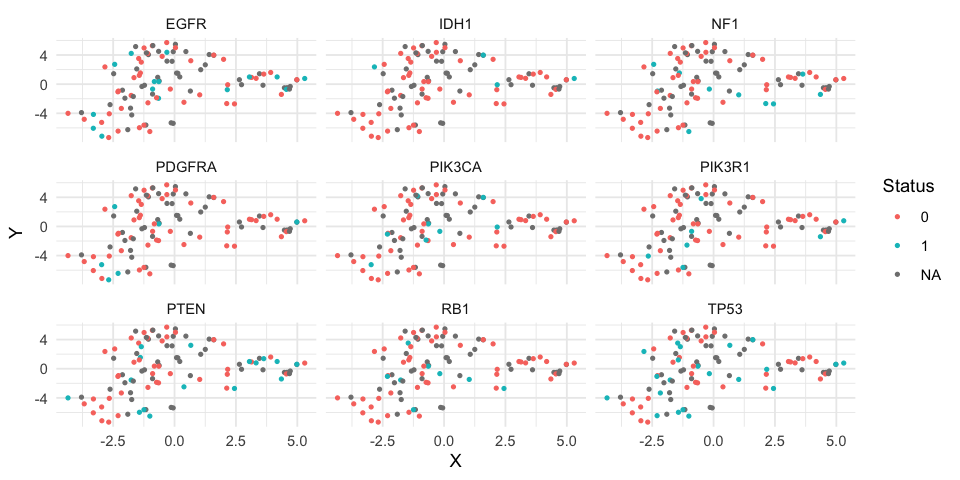

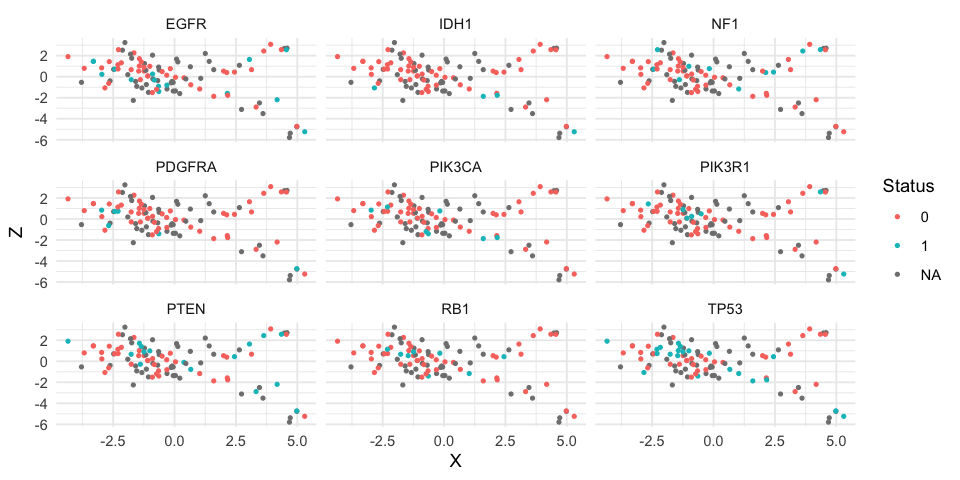

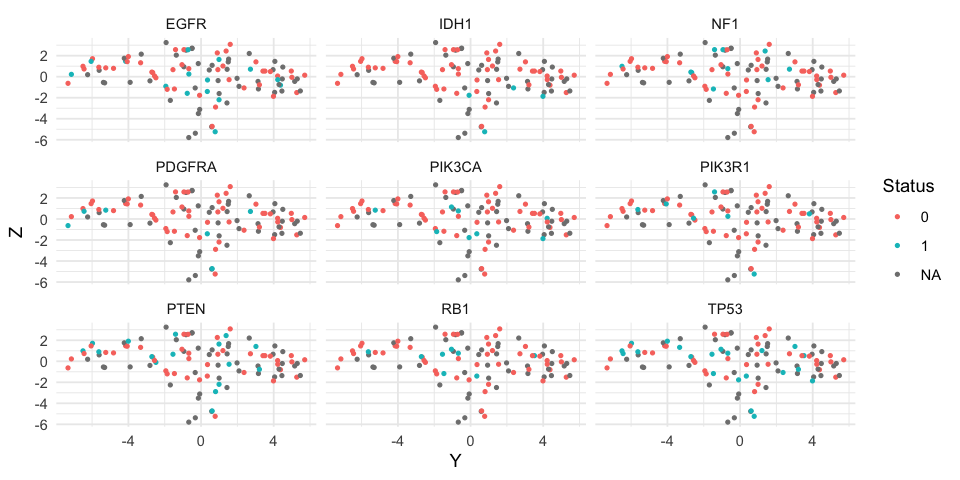

In [5]:
#Loads mutation data
mut <- read.table("data/data_glioblastoma_2/matrix_mutation_9.txt", header = TRUE, sep="\t")
mut <- as.data.frame(mut)
#Binds t-SNE features and mutation data
matrix <- cbind(data, mut[rownames(data), ])
#Converts mut to factor type
for (col in c("TP53","RB1","NF1","PIK3CA","PTEN","EGFR","PDGFRA", "IDH1", "PIK3R1")){
matrix[,col] <- as.factor(matrix[,col] )
}
matrix.tidy <- matrix %>% gather( Gene, Status, c(4:ncol(matrix)))
options(repr.plot.width=8, repr.plot.height=4)

ggplot(matrix.tidy, aes(x=X, y=Y)) +
          geom_point(size = 0.8, stat="identity", aes(colour=Status))+
          facet_wrap( ~Gene)+
          theme_minimal()

ggplot(matrix.tidy, aes(x=X, y=Z)) +
          geom_point(size = 0.8, stat="identity", aes(colour=Status))+
          facet_wrap( ~Gene)+
          theme_minimal()

ggplot(matrix.tidy, aes(x=Y, y=Z)) +
          geom_point(size = 0.8, stat="identity", aes(colour=Status))+
          facet_wrap( ~Gene)+
          theme_minimal()



<p  style="text-align:justify; line-height: 2; margin: 3px">
Results show,again, no grouping of samples in either of the explored dimensiones, for either of the genes.
<br>
This again possibly means that the predictive value of the imaging features regarding the mutation status of genes is not significant, or that it is indeed significant in the high-dimensional space, but t-SNE is not able to capture that in the 3-d space.
<br>
<br>

To test the distance between samples, a matrix of Euclidean distances sample-wise was computed in the low-dimensional space. Considering the 57 cases with mutation data, the two farthest points were selected and, for each of them, the closest neighbour was selected, resulting in two pairs of points being the farthest away possible and each pair being composed by two points the closest possible.
</p>


In [6]:
##Finds pairs of images to visualise and compare
##Loads the matrix with distances
##1. Finds the 2 most distant points (highest value in the matrix), and keeps row name and column name
##2. Goes through the selected row and finds the closest point (lowest value in the row) - keeps the column name
##3. Goes through the selected column and find the closest point (lowest value in the column) - keeps the row name
##4. Now, we will have two pairs of images, each member of the pair the closest possible, and each pair, the farthest possible

#Matrix with features only for cases with mutation data
matrix_nn <- matrix[rowSums(is.na(matrix)) == 0, ]

#Computes distance between rows for rows with mutation data
dist <- as.matrix(dist(matrix_nn[1:3], method = "euclidean"))

#Matrix to store names of pairs
names <- matrix(data=NA, ncol=2, nrow=2)
#########################Finds the two most distant points##########################

#Finds index of maximun value (keeps just one - there are 2 since the matrix is symmetric)
index.distant <- which(dist == max(dist))[1]

#Gets the column index
index.col <- ceiling(index.distant/nrow(dist))

#Gets the row index
index.row <- which(dist[ , index.col] == max(dist))

#Gets row name and column name
names[1,1] <- rownames(dist)[index.row] 
names[2,1] <- colnames(dist)[index.col]

#########################Finds the closest points##########################

##Changes zeros by Inf to avoid selecting them
dist[dist==0] <- Inf

#Finds closest point in the row
col.min <- which( dist[index.row, ] == min(dist[index.row ,]) )
names[1,2] <- colnames(dist)[col.min]
#Finds closest point in the column
row.min <- which( dist[, index.col ] == min(dist[, index.col]) )
names[2,2] <- rownames(dist)[row.min]

names

TCGA-19-2631,TCGA-19-2624
TCGA-06-0240,TCGA-76-6285


The first pair was composed by TCGA-19-2631 and TCGA-19-2624, and the second pair by TCGA-06-0240 and TCGA-76-6285.

We explore the volumetric features with a parallel coordinates plot:


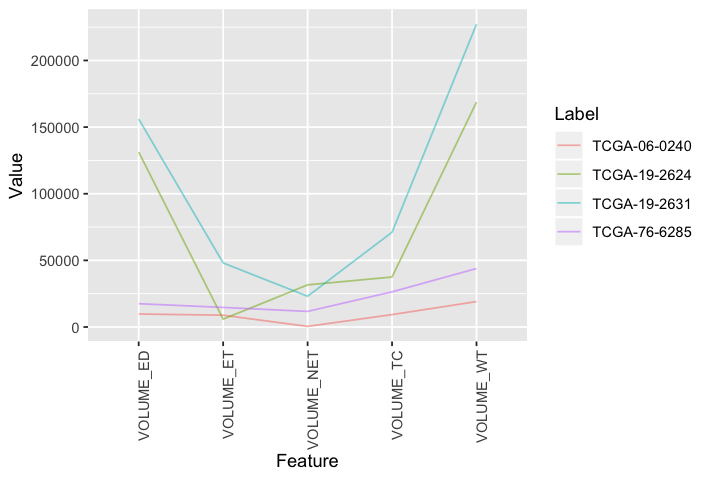

In [7]:
#Explore volumetric features
data.v <- im[c("TCGA-19-2631", "TCGA-19-2624", "TCGA-06-0240", "TCGA-76-6285"), c("VOLUME_ED","VOLUME_ET","VOLUME_NET","VOLUME_TC","VOLUME_WT")]
data.v <- cbind(rownames(data.v),data.v)
colnames(data.v)[1] <- "Label"

#Tidy data matrix
data.v.tidy <- data.v %>% gather( Feature, Value, c(2:ncol(data.v)))


#Plot
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data.v.tidy, aes(x=Feature, y=Value, group=Label)) +
    geom_line(aes(color=Label), position = "identity", alpha=0.5)+ 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))



<p  style="text-align:justify; line-height: 2; margin: 3px"> 
The plot shows that the cases belonging to the same group follow the same trends, which are different between the groups. 

<br>
When comparing the T2-FLAIR images, tumors of cases TCGA-19-2624 and TCGA-19-2631 appear with a bigger volume than tumors of cases TCGA-06-0240 and TCGA-76-6285 (Figure 1). Studying the mutation status of the 9 relevant genes in glioblastoma, TCGA-19-2631 and TCGA-16-2624 both have mutations in one gene (PDGFRA and EGFR, respectively), whereas the second pair does not have any of those genes mutated.
</p>



![T2-FLAIR MRI images](img/img_glioblastoma_2/tsnes_images.jpg)
<b>Figure 1.</b> T2-FLAIR images of pair of cases selected. The first pair is composed by (A) TCGA-19-2631 and (B) TCGA-19-2624, and the second pair is composed by (C) TCGA-06-0240 and (D)TCGA-76-6285. 
<br>
<br>


<p  style="text-align:justify; line-height: 2; margin: 3px">
This shows that close points in the t-SNE space do share similar characteristics and are, at the same time, different from distant points. However,it is also true that t-SNE tries to find a very low dimensional map of the points, which in this case might not be enough to capture the complexity of the imaging features [1].
</p>



### Conclusions

<p  style="text-align:justify; line-height:2; margin: 3px">
• A 3-dimensional map of the 704 imaging features was computed<br>
• When labelling with gender, survival status after one year, and mutation status of the 9 relevant genes in glioblastoma, no grouping of samples was observed. <br>
• When studying 2 pairs of cases selected, however, differences were observed for the volumetric features, and the tumor morphology.


</p>

# References
[1] Gonzalez Pigorini G. Association of radiological and genomic features for cancer stratification [MRes Biomedical Research (Data Science)]. Imperial College London; 2018. 
<br>
<br>
[2]Spyridon Bakas, Hamed Akbari, Aristeidis Sotiras, Michel Bilello, Martin Rozycki, Justin S. Kirby, John B. Freymann, Keyvan Farahani, and Christos Davatzikos. Advancing The Cancer Genome Atlas glioma MRI collections with expert segmentation labels and radiomic features. Scientific Data, 4(September):170117, 2017. URL http://www.nature.com/articles/sdata2017117.
<br>
<br>
[3] GDC [Internet]. Portal.gdc.cancer.gov. 2018 [cited 2 April 2018]. Available from: https://portal.gdc.cancer.gov/exploration?filters=%7B%22op%22%3A%22AND%22%2C%22content%22%3A%5B%7B%22op%22%3A%22IN%22%2C%22content%22%3A%7B%22field%22%3A%22cases.case_id%22%2C%22value%22%3A%5B%22set_id%3AAWJSvsz3Wcjtn2KP3xMl%22%5D%7D%7D%5D%7D&searchTableTab=genes
